# Metriken

## Distanzmaße zum Vergleich von Audiosignalen

Der Vergleich von Audiosignalen auf Basis von Distanzmetriken bringt verschiedene Herausforderungen mit sich. Geringfügige Veränderungen der Amplitude oder Phase führen leicht zu großen Fehlern, obwohl die eigentlichen Qualitäten des Signals sich nur unwesentlich verändern. Zusätzlich sind physikalische Eigenheiten der menschlichen Wahrnehmung zu berücksichtigen. So verhält sich die empfundene Lautheit eines Signals nicht linear zu dessen Amplitude. Darüber hinaus wird die Lautheit eines Signals in Abhängigkeit von ihrer Frequenz unterschiedlich wahrgenommen. 

Insbesondere in der Literatur der Spracherkennung werden deshalb verschiedene Maaße vorgeschlagen, die den Abstand zwischen zwei Signalen als Ungleichheit von prägnanten Mustern in den Signalen interpretieren, anstatt Positions-genaue Differenzen zu betrachten. In dieser Arbeit finden davon zwei Maße Einzug: die *Log Spectral Distance* (LSD) und das *Dynamic Time Wraping* (DTW).

Die Log Spectral Distance berechnet die Distanz von zwei Signalen auf Grundlage ihrer logarithmierten Leistungsspektren. Die Vernachlässigung der Phaseninformation macht das Verfahren robuster gegenüber kleinen Verschiebungen von Signalen. Darüber hinaus wird durch die Logarithmierung näherungsweise das nicht-lineare Lautsheits-Empfinden des Menschen nachempfunden.

!! Part zu Dynamic Time Wraping

(vgl. *Rabiner, Juang. Fundamentals of Speech Recognition; Roads. The Computer Music Tutorial*)

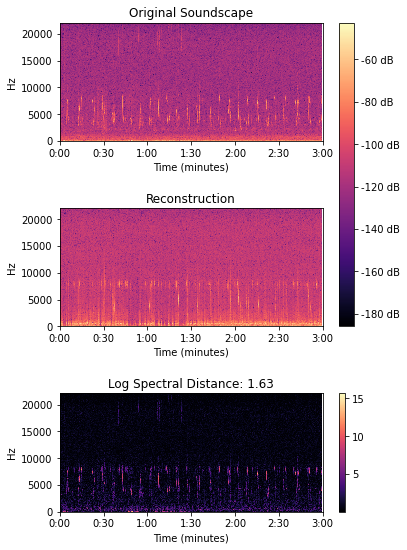

In [9]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from maad import sound, util
import librosa

# High traffic noise
a1 = pathlib.Path("../../data/soundscapes_multiloc_corr/test/S4A09093_20190507_061700.wav")
# Frequent birds, traffic in the background
a2 = pathlib.Path("../../data/soundscapes_multiloc_corr/test/S4A08697_20190506_145900.wav")


fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

f = a2
# Plot original
x1, sr = sf.read(f)
Sxx1_power, _, _, _ = sound.spectrogram(x1, fs=sr)
Sxx1_dB = util.power2dB(Sxx1_power)
img1 = librosa.display.specshow(Sxx1_dB, sr=sr, hop_length=512, x_axis="m", y_axis="hz", ax=ax1)
ax1.set_xticks(np.arange(0, 181, 30))
ax1.set_title("Original Soundscape")

# Plot reconstruction
f_rec = pathlib.Path("../../data/soundscapes_multiloc_corr/pollutions/003/reconstructions/001") / f.name
x2, _ = sf.read(f_rec)
Sxx2_power, _, _, _ = sound.spectrogram(x2, fs=sr)
Sxx2_dB = util.power2dB(Sxx2_power)
img2 = librosa.display.specshow(Sxx2_dB, sr=sr, hop_length=512, x_axis="m", y_axis="hz", ax=ax2)
ax2.set_xticks(np.arange(0, 181, 30))
ax2.set_title("Reconstruction")


# Plot Log Distance
Sxx3_log = np.sqrt(np.square(np.log(Sxx1_power + 1e-12) - np.log(Sxx2_power[:,:-1] + 1e-12)))
LSD = np.mean(
    np.sum(
        np.square(np.log(Sxx1_power + 1e-12) - np.log(Sxx2_power[:,:-1] + 1e-12)),
        axis=0
    ) / Sxx1_power.shape[0]
)
img3 = librosa.display.specshow(Sxx3_log, sr=sr, hop_length=512, x_axis="m", y_axis="hz", ax=ax3)
ax3.set_xticks(np.arange(0, 181, 30))
title = f"Log Spectral Distance: {LSD:.2f}"
ax3.set_title(title)

fig.set_figheight(8)
fig.tight_layout(pad=2.0)
fig.colorbar(img1, format="%+2.f dB", ax=(ax1, ax2))
fig.colorbar(img3, ax=ax3)

plt.show()

In [14]:
import pandas as pd

df_rec = pd.read_csv("../../data/soundscapes_multiloc_corr/pollutions/001/reconstructions/001/test_results.csv", index_col=0)
df_rec.describe()

,NP,Bio,NDSI,ACI,ADI,AEI,Ht,Hf,H,lsd,dtw
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,26.857143,5.163583,0.062613,38.281781,0.115251,0.039838,0.006367,0.033129,0.025588,0.893434,2.141055
std,12.567532,3.496195,0.167853,5.674197,0.130526,0.060535,0.007268,0.079076,0.044081,0.628775,9.771313
min,0.000000,0.026735,0.000146,27.359538,0.000276,0.000041,0.000022,0.000387,0.000122,0.363388,0.072749
25%,19.000000,2.591099,0.005795,34.674403,0.015444,0.006302,0.001226,0.003175,0.003847,0.450125,0.093401
50%,26.000000,4.777580,0.012446,39.074762,0.060124,0.016683,0.005075,0.015793,0.013335,0.758566,0.282908
75%,38.250000,7.383499,0.045591,40.515158,0.183702,0.044308,0.006972,0.038061,0.031624,1.105434,0.583312
max,45.000000,17.775551,1.185005,63.639804,0.465761,0.333559,0.033437,0.589110,0.311059,4.321511,71.696612


In [15]:
df_rec[df_rec["dtw"] > 71]
df_rec[df_rec["NP"] > 44]


,name,NP,Bio,NDSI,ACI,ADI,AEI,Ht,Hf,H,lsd,dtw
1,S4A08684_20190507_035200.wav,45.0,7.316927,0.028338,39.789417,0.003115,0.037790,0.007920,0.024427,0.019229,0.366583,0.076111
48,S4A09106_20190508_005800.wav,45.0,7.928837,0.041744,41.186488,0.016086,0.058314,0.003778,0.068281,0.063945,0.377014,0.084478


In [7]:
df_rec = pd.read_csv("../../data/soundscapes_multiloc_corr/pollutions/002/test_audio/test_results.csv", index_col=0)
df_rec.describe()


,NP,Bio,NDSI,ACI,ADI,AEI,Ht,Hf,H,lsd,dtw
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,6.571429,14.363315,0.122807,49.206992,0.533232,0.239637,0.012839,0.114569,0.116031,4.388879,0.531048
std,5.151724,16.933458,0.110504,49.221477,0.659727,0.267457,0.014658,0.091664,0.094287,0.752873,0.051172
min,0.000000,0.019901,0.000036,0.461950,0.000018,0.000001,0.000045,0.000043,0.000079,3.148851,0.353636
25%,2.000000,0.909778,0.023714,7.696362,0.018217,0.020949,0.002201,0.026147,0.026345,3.888149,0.504992
50%,6.500000,7.971507,0.091022,26.469178,0.174750,0.089359,0.007367,0.096551,0.097354,4.169871,0.519341
75%,9.250000,24.767193,0.203146,89.295424,0.863661,0.495401,0.014554,0.197594,0.196822,4.716321,0.536590
max,24.000000,67.228679,0.392948,159.436058,2.845135,0.819550,0.057224,0.296597,0.311464,6.466166,0.688117


In [8]:

df_rec = pd.read_csv("../../data/soundscapes_multiloc_corr/pollutions/002/reconstructions/001/test_results.csv", index_col=0)
df_rec.describe()

,NP,Bio,NDSI,ACI,ADI,AEI,Ht,Hf,H,lsd,dtw
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,30.482143,13.372397,0.427006,23.879596,0.752535,0.257328,0.103116,0.121287,0.123781,2.105387,3.892486
std,15.968140,8.631020,0.348865,12.792650,0.869593,0.338161,0.155288,0.083049,0.109356,1.456788,6.481415
min,0.000000,0.938970,0.006895,0.545227,0.002438,0.003239,0.001785,0.005914,0.003121,0.484971,0.126613
25%,18.000000,7.237269,0.085858,14.637627,0.121331,0.023569,0.011676,0.072514,0.061659,0.908819,0.443117
50%,33.000000,12.184321,0.408359,23.681926,0.327663,0.048282,0.031203,0.104004,0.095325,1.878142,1.049987
75%,42.000000,17.628318,0.706214,32.640820,1.166326,0.444616,0.077635,0.150148,0.143262,3.172885,2.259606
max,62.000000,35.754099,1.353224,54.369472,2.947533,0.938956,0.576374,0.416302,0.495078,7.249187,22.618602


In [10]:
df_rec = pd.read_csv("../../data/soundscapes_multiloc_corr/pollutions/003/test_audio/test_results.csv", index_col=0)
df_rec.describe()

,NP,Bio,NDSI,ACI,ADI,AEI,Ht,Hf,H,lsd,dtw
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,10.785714,18.995929,0.046549,4.937914,0.506082,0.221981,0.006305,0.042511,0.041282,1.079165,0.464137
std,10.790087,10.955748,0.071121,15.697306,0.448693,0.265518,0.007291,0.046012,0.044272,1.759550,1.677322
min,0.000000,0.057599,0.000328,0.019243,0.000242,0.000010,0.000086,0.000675,0.000560,0.315377,0.049735
25%,2.000000,8.200766,0.004686,0.155178,0.121750,0.019110,0.001337,0.004089,0.005097,0.363196,0.051798
50%,8.000000,23.156361,0.020866,0.426668,0.334122,0.068127,0.003544,0.025199,0.022540,0.533099,0.067179
75%,16.000000,28.926197,0.056843,1.802894,0.812242,0.525985,0.008877,0.068326,0.065357,0.940141,0.154138
max,43.000000,37.785885,0.411181,100.072217,1.293318,0.694457,0.032187,0.171909,0.156258,11.807333,10.262090


In [11]:
df_rec = pd.read_csv("../../data/soundscapes_multiloc_corr/pollutions/003/reconstructions/001/test_results.csv", index_col=0)
df_rec.describe()

,NP,Bio,NDSI,ACI,ADI,AEI,Ht,Hf,H,lsd,dtw
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,25.964286,21.538709,0.143840,38.746715,0.637939,0.253023,0.036641,0.070499,0.069031,2.045376,2.397377
std,14.007744,14.704441,0.201237,9.166682,0.390060,0.266935,0.061028,0.053929,0.056254,1.508367,5.279289
min,2.000000,0.259558,0.001059,29.676273,0.015183,0.000272,0.000023,0.001719,0.003061,0.860717,0.499517
25%,15.750000,13.315521,0.018991,34.636027,0.290148,0.036681,0.008676,0.031755,0.030681,1.260236,0.563376
50%,22.500000,20.311283,0.059624,37.044077,0.629108,0.121840,0.017185,0.058279,0.053976,1.577862,0.595645
75%,40.000000,22.420971,0.193977,39.264485,0.924432,0.556014,0.036813,0.099172,0.092702,1.983667,1.468039
max,49.000000,69.063956,1.108473,83.581046,1.533281,0.759093,0.310301,0.240889,0.274728,8.938410,29.210763
